In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Train_knight.csv')
#df = pd.read_csv('../Test_knight.csv')

In [3]:
# Create a StandardScaler
scaler = StandardScaler()

# Select numeric columns to standarize
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Standarize data
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Combine dfs to recover knight column
if 'knight' in df.columns:
    df_standarized = pd.concat([df_scaled, df[['knight']]], axis=1)
else:
    df_standarized = df_scaled.copy()

In [4]:
print("Original data")
print(df.head())

Original data
   Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0        11.80     17.26     75.26   431.9  0.09087    0.06232   0.028530   
1        19.81     22.15    130.00  1260.0  0.09831    0.10270   0.147900   
2        10.97     17.20     71.73   371.5  0.08915    0.11130   0.094570   
3        11.62     18.18     76.38   408.8  0.11750    0.14830   0.102000   
4        11.26     19.83     71.30   388.1  0.08511    0.04413   0.005067   

   Prescience  Reactivity  Midi-chlorien  ...  Evade   Stims  Sprint   Combo  \
0    0.016380      0.1847        0.06019  ...  24.49   86.00   562.0  0.1244   
1    0.094980      0.1582        0.05395  ...  30.88  186.80  2398.0  0.1512   
2    0.036130      0.1489        0.06640  ...  26.87   90.14   476.4  0.1391   
3    0.055640      0.1957        0.07255  ...  25.40   88.14   528.1  0.1780   
4    0.005664      0.1637        0.06343  ...  26.43   76.38   435.9  0.1108   

     Delay  Attunement  Empowered   Burst 

In [5]:
print("Standarized data")
print(df_standarized.head())
print(df_standarized.describe())

Standarized data
   Sensitivity  Hability  Strength     Power   Agility  Dexterity  Awareness  \
0    -0.672190 -0.447007 -0.701691 -0.647079 -0.408080  -0.812359  -0.770179   
1     1.671168  0.731340  1.624479  1.798709  0.139449  -0.019929   0.742230   
2    -0.915010 -0.461465 -0.851698 -0.825470 -0.534659   0.148840   0.066543   
3    -0.724850 -0.225314 -0.654097 -0.715305  1.551689   0.874940   0.160680   
4    -0.830169  0.172288 -0.869971 -0.776442 -0.831973  -1.169325  -1.067454   

   Prescience  Reactivity  Midi-chlorien  ...     Evade     Stims    Sprint  \
0   -0.867035    0.173459      -0.366543  ... -0.172521 -0.651490 -0.581014   
1    1.222095   -0.826745      -1.308423  ...  0.896162  2.461756  2.839651   
2   -0.342094   -1.177761       0.570808  ...  0.225517 -0.523624 -0.740496   
3    0.176467    0.588639       1.499103  ... -0.020330 -0.585395 -0.644173   
4   -1.151858   -0.619156       0.122510  ...  0.151931 -0.948607 -0.815952   

      Combo     Delay  Attu

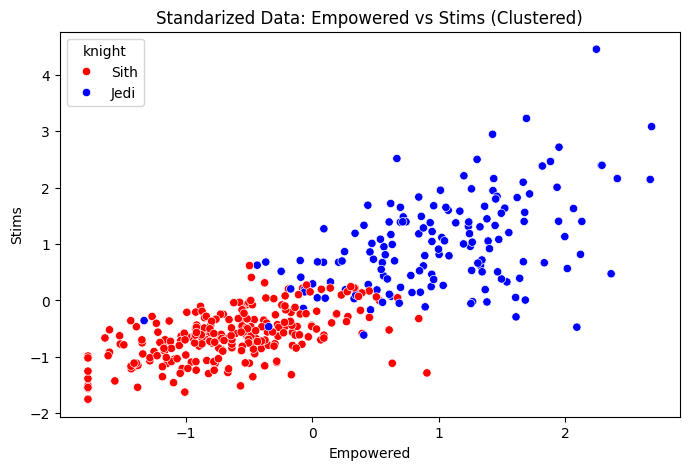

In [6]:
plt.figure(figsize=(8, 5))

if 'knight' in df.columns:
    sns.scatterplot(data=df_standarized, x='Empowered', y='Stims', hue='knight', palette={"Jedi": "blue", "Sith": "red"})
    plt.title('Standarized Data: Empowered vs Stims (Clustered)')
else:
    sns.scatterplot(data=df_standarized, x='Empowered', y='Stims', color='green', label='knight')
    plt.title('Standarized Data: Empowered vs Stims (Undifferentiated)')